In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib
import math
import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
white_data = np.loadtxt('WhiteWine.txt')
print (white_data)
print (white_data.shape)

[[  7.00000000e+00   2.70000000e-01   3.60000000e-01 ...,   8.80000000e+00
    6.00000000e+00   7.54697205e-01]
 [  6.30000000e+00   3.00000000e-01   3.40000000e-01 ...,   9.50000000e+00
    6.00000000e+00   6.65575384e-03]
 [  8.10000000e+00   2.80000000e-01   4.00000000e-01 ...,   1.01000000e+01
    6.00000000e+00   2.31103669e-01]
 ..., 
 [  6.50000000e+00   2.40000000e-01   1.90000000e-01 ...,   9.40000000e+00
    6.00000000e+00   6.35963214e-01]
 [  5.50000000e+00   2.90000000e-01   3.00000000e-01 ...,   1.28000000e+01
    7.00000000e+00   7.20571531e-01]
 [  6.00000000e+00   2.10000000e-01   3.80000000e-01 ...,   1.18000000e+01
    6.00000000e+00   1.18534545e-01]]
(4898, 13)


In [6]:
red_data = np.loadtxt('RedWine.txt')
print (red_data)
print (red_data.shape)

[[  7.4          0.7          0.         ...,   9.4          5.
    0.19621208]
 [  7.8          0.88         0.         ...,   9.8          5.
    0.02017723]
 [  7.8          0.76         0.04       ...,   9.8          5.
    0.75699829]
 ..., 
 [  6.3          0.51         0.13       ...,  11.           6.
    0.12639743]
 [  5.9          0.645        0.12       ...,  10.2          5.
    0.39249167]
 [  6.           0.31         0.47       ...,  11.           6.
    0.76193799]]
(1599, 13)


In [7]:
data = np.row_stack((white_data, red_data))
data_std = StandardScaler().fit_transform(data)
print (data_std)

[[  7.00000000e+00   2.70000000e-01   3.60000000e-01 ...,   8.80000000e+00
    6.00000000e+00   7.54697205e-01]
 [  6.30000000e+00   3.00000000e-01   3.40000000e-01 ...,   9.50000000e+00
    6.00000000e+00   6.65575384e-03]
 [  8.10000000e+00   2.80000000e-01   4.00000000e-01 ...,   1.01000000e+01
    6.00000000e+00   2.31103669e-01]
 ..., 
 [  6.30000000e+00   5.10000000e-01   1.30000000e-01 ...,   1.10000000e+01
    6.00000000e+00   1.26397426e-01]
 [  5.90000000e+00   6.45000000e-01   1.20000000e-01 ...,   1.02000000e+01
    5.00000000e+00   3.92491675e-01]
 [  6.00000000e+00   3.10000000e-01   4.70000000e-01 ...,   1.10000000e+01
    6.00000000e+00   7.61937991e-01]]
(6497, 13)
[[-0.16608919 -0.42318303  0.28468605 ..., -1.41855821  0.20799905
   0.88855302]
 [-0.70607349 -0.24094936  0.14704613 ..., -0.83161516  0.20799905
  -1.68935618]
 [ 0.68245757 -0.36243847  0.55996589 ..., -0.32852111  0.20799905
  -0.91586115]
 ..., 
 [-0.70607349  1.03468634 -1.29817304 ...,  0.42611996  

In [8]:
white_std = data_std[0:4898]
print(white_std)
print(white_std.shape)
red_std = data_std[4898:]
print(red_std.shape)

[[-0.16608919 -0.42318303  0.28468605 ..., -1.41855821  0.20799905
   0.88855302]
 [-0.70607349 -0.24094936  0.14704613 ..., -0.83161516  0.20799905
  -1.68935618]
 [ 0.68245757 -0.36243847  0.55996589 ..., -0.32852111  0.20799905
  -0.91586115]
 ..., 
 [-0.55179227 -0.6054167  -0.88525328 ..., -0.91546416  0.20799905
   0.47937055]
 [-1.32319841 -0.30169391 -0.12823371 ...,  1.9354021   1.35322771
   0.77094872]
 [-0.93749534 -0.78765037  0.42232597 ...,  1.09691202  0.20799905
  -1.30379818]]
(4898, 13)
(1599, 13)


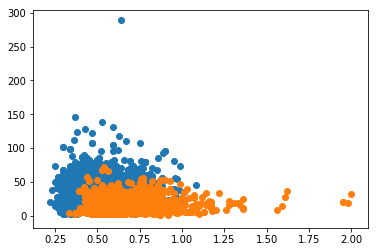

In [47]:
plt.scatter(white_data[:, 9], white_data[:,5])
plt.scatter(red_data[:, 9], red_data[:, 5])

In [9]:
def comput_Sb(x,y):
    len_total = len(x)+len(y)
    ux = comput_u(x)
    uy = comput_u(y)
    u0 = comput_u(np.row_stack((x,y)))
    Sb = len(x)/len_total*(ux - u0)@(ux - u0).T + len(y)/len_total*(uy - u0)@(uy - u0).T
    return Sb      

In [10]:
def variance(data):
    n = len(data)
    u = comput_u(data)
    sum = np.zeros(shape=(data.shape[1],data.shape[1]))
    for x in data:
        a = np.zeros(shape=(1,x.shape[0]))
        x = x+a
        x = x.T
        sum += (x-u)@(x-u).T
    return sum/n   

In [11]:
def comput_Sw(x,y):
    ox = variance(x)
    oy = variance(y)
    n = len(x)+len(y)
    return (len(x)/n * ox + len(y)/n * oy)   

In [12]:
def comput_u(data):
    n = len(data)
    sum = np.zeros(shape=(1,data.shape[1]))
    for x in data:
        sum += x
    return (sum/n).T   

In [13]:
def fisher_ratio(x,y):
    Sw = comput_Sw(x,y)
    Sb = comput_Sb(x,y)
    I = np.eye(Sw.shape[0],Sw.shape[1])
    inv = np.linalg.inv(Sw+0.0001*I)
    return np.trace(Sb@inv)

In [26]:
a = fisher_ratio(white_std,red_std)
print(a)

7630.42618406


In [14]:
#FFS 
def ffs(x,y):
    fisher_max_list = []
    feature_index_max = []
    index_list = []
    for i in range(0,x.shape[1]):
        index_list.append(i)    
    for i in range(1,x.shape[1]+1):
        if len(feature_index_max) > 0:
            x_i = x[:,feature_index_max[0]]
            y_i = y[:,feature_index_max[0]]
            for k in range(1,len(feature_index_max)):
                x_i = np.row_stack((x_i,x[:,feature_index_max[k]]))
                y_i = np.row_stack((y_i,y[:,feature_index_max[k]]))
            x_temp = x_i
            y_temp = y_i
            f =1
        else: f = 0
        fisher_max = 0
        feature_index = 0
        for j in index_list:
            if f == 0:
                x_i = x[:,j]
                a = np.zeros(shape=(1,x_i.shape[0]))
                x_i = x_i + a
                y_i = y[:,j]
                b = np.zeros(shape=(1,y_i.shape[0]))
                y_i = y_i + b
            else:
                x_i = np.row_stack((x_temp,x[:,j]))
                y_i = np.row_stack((y_temp,y[:,j]))
            fisher = fisher_ratio(x_i.T,y_i.T)
            if fisher > fisher_max:
                fisher_max = fisher
                feature_index = j
        feature_index_max.append(feature_index)
        index_list.remove(feature_index)
        fisher_max_list.append(fisher_max)
    return fisher_max_list,feature_index_max
        

In [15]:
list1=[]
list2=[]
list1,list2 = ffs(white_std,red_std)

In [16]:
print(list1)
print(list2)

[0.96252018154867214, 1.953823760647996, 3.3252901618246256, 4.3455269359338633, 5.2219909718836179, 5.5574187597351488, 5.8382597370645311, 6.0193279197098573, 6.0937662587641794, 6.1543488784121534, 6.2163134562993747, 6.2613040508275244, 6.2614201502494584]
[6, 7, 3, 1, 10, 5, 0, 4, 8, 9, 2, 11, 12]


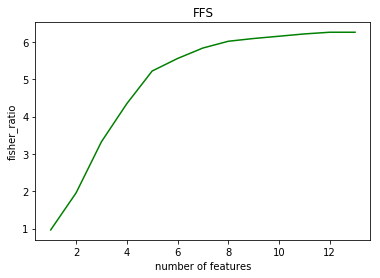

In [17]:
xrange = np.arange(1,14,1)
p1 = plt.plot(xrange, list1, 'g')
plt.ylabel('fisher_ratio') 
plt.xlabel('number of features')
plt.title('FFS')

In [18]:
#BFS
def bfs(x,y):
    fisher = fisher_ratio(x,y)#13
    fisher_max_list = [fisher]
    index_list = []
    x_i = x
    y_i = y
    for i in range (1,13):
        fisher_max = 0
        if len(index_list) != 0:
            x_i = np.delete(x_i,index_list[-1],1)
            y_i = np.delete(y_i,index_list[-1],1)
        l = (x_i.shape[1])
        for j in range(0,l):
            x_j = np.column_stack((x_i[:,0:j],x_i[:,j+1:l]))
            y_j = np.column_stack((y_i[:,0:j],y_i[:,j+1:l]))
            fisher = fisher_ratio(x_j,y_j)
            if fisher > fisher_max:
                fisher_max = fisher
                j_max = j
        index_list.append(j_max)
        fisher_max_list.append(fisher_max)
    return index_list,fisher_max_list

In [19]:
list3=[]
list4=[]
list3,list4 = bfs(white_std,red_std)
print(list3)
print(list4)

[12, 11, 2, 8, 7, 3, 0, 2, 4, 0, 0, 1]
[6.261420150249454, 6.26130405082752, 6.2163134562993712, 6.1543488784121489, 6.0937662587641741, 6.0193279197098519, 5.8382597370645284, 5.5574187597351514, 5.2219909718836206, 4.3455269359338651, 3.3252901618246251, 1.953823760647996, 0.96252018154867214]


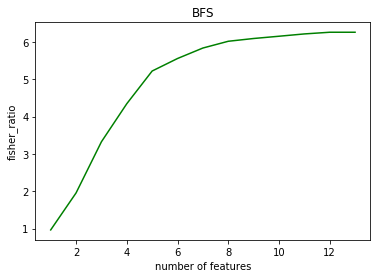

In [20]:
xrange = np.arange(1,14,1)
list4.reverse()
p1 = plt.plot(xrange, list4, 'g')
plt.ylabel('fisher_ratio') 
plt.xlabel('number of features')
plt.title('BFS')